In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FCI_functions.FCI_functions import calculate_pre_score, calculate_post_score, calculate_question_score_post, calculate_question_score_pre

In [2]:
df16_111 = pd.read_excel('rawdata/2016-17 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df16_112 = pd.read_excel('rawdata/2016-17 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_111 = pd.read_excel('rawdata/2014-15 WT1 Phys 111 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_112 = pd.read_excel('rawdata/2014-15 WT1 Phys 112 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_111 = pd.read_excel('rawdata/2015-16 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_112 = pd.read_excel('rawdata/2015-16 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_111 = pd.read_excel('rawdata/2017-18 WT1 Phys 111 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_112 = pd.read_excel('rawdata/2017-18 WT1 Phys 112 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_111 = pd.read_excel('rawdata/2018-19 WT1 Phys 111 ALL Data - Shared with David (20190530).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_112 = pd.read_excel('rawdata/2018-19 WT1 Phys 112 ALL Data - Shared with David (20190527).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df19_111 = pd.read_excel('rawdata/2019-20 WT1 Phys 111 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df19_112 = pd.read_excel('rawdata/2019-20 WT1 Phys 112 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df20 = pd.read_excel('rawdata/2020-21 WT1 Phys 111&112 ALL Data - Shared with Chelsea (20210329).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
is_111 = df20['Course'] == 111
df20_111 = df20[is_111]
is_112 = df20['Course'] == 112
df20_112 = df20[is_112]

In [3]:
def calculate_pre_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "PRE Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1                
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [4]:
def calculate_pre_score_FDM_2020(student):
    corr_ans = [3 , 4, 2 , 3, 2 , 3 , 5, 1, 3 , 4 , 5, 1]
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "PRE Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [5]:
def calculate_post_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "POST Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [6]:
def calculate_post_score_FDM_2020(student):
    corr_ans = [3 , 4, 2 , 3, 2 , 3 , 5, 1, 3 , 4 , 5, 1]
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "POST Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [106]:
fdm111 = pd.DataFrame()
fdm112 = pd.DataFrame()

In [107]:
def FDM(df111, df112, year):
    df111.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=8)
    df111.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=8)
    plt.legend(["post", "pre"])
    plt.title("111 " + year)
    #plt.xlim(0,7)
    plt.show()
    
    df1 = df111.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 PRE " + year)
    fdm111["111 PRE" + year] = df1
    df1["111 POST "+ year] = df111.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    fdm111["111 POST" + year] = df1["111 POST "+ year]

    print(df1)

    df112.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df112.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("112 "+ year)
    #plt.xlim(0,7)
    plt.show()

    df2 = df112.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 PRE " + year)
    fdm112["112 PRE" + year] = df2
    df2["112 POST " + year] = df112.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    fdm112["112 POST" + year] = df2["112 POST "+ year]
    
    print(df2)

    is_f111 = df111['PRE Q85']== 'A'
    df_f111 = df111[is_f111]
    
    is_f112 = df112['PRE Q85']== 'A'
    df_f112 = df112[is_f112]

    df_f111.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f111.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 111 " + year)
    plt.show()
    
    df3 = df111.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 FEMALE PRE")
    df3["111 FEMALE POST " + year ] = df111.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)

    print(df3)
    
    df_f112.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f112.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 112 " + year)
    plt.show()
    
    df4 = df112.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 FEMALE PRE")
    df4["112 FEMALE POST " + year] = df112.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    print(df4)

In [108]:
def FDM_2020(df111, df112):
    df111.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df111.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("111")
    #plt.xlim(0,7)
    plt.show()
    
    df1 = df111.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 PRE")
    df1["111 POST"] = df111.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)

    print(df1)

    df112.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df112.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("112")
    #plt.xlim(0,7)
    plt.show()

    df2 = df112.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 PRE")
    df2["112 POST " + year] = df112.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)
    print(df2)

    is_f111 = df111['PRE Q12']== 1
    df_f111 = df111[is_f111]
    
    is_f112 = df112['PRE Q12']== 1
    df_f112 = df112[is_f112]

    df_f111.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f111.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 111")
    plt.show()
    
    df3 = df111.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 FEMALE PRE")
    df3["111 FEMALE POST"] = df111.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)

    print(df3)
    
    df_f112.apply(calculate_post_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f112.apply(calculate_pre_score_FDM_2020, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 112")
    plt.show()
    
    df4 = df112.apply(calculate_pre_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 FEMALE PRE")
    df4["112 FEMALE POST"] = df112.apply(calculate_post_score_FDM_2020, axis=1).value_counts(normalize=True, ascending=True)
    print(df4)

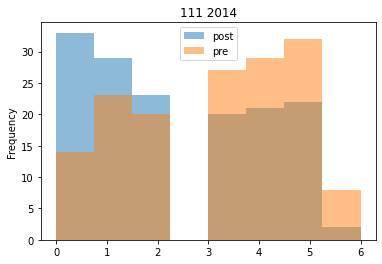

     111 PRE 2014  111 POST 2014
6.0      0.052288       0.013333
0.0      0.091503       0.220000
2.0      0.130719       0.153333
1.0      0.150327       0.193333
3.0      0.176471       0.133333
4.0      0.189542       0.140000
5.0      0.209150       0.146667


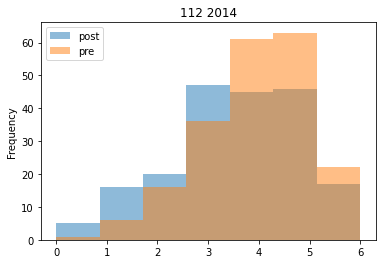

     112 PRE 2014  112 POST 2014
0.0      0.004878       0.025510
1.0      0.029268       0.081633
2.0      0.078049       0.102041
6.0      0.107317       0.086735
3.0      0.175610       0.239796
4.0      0.297561       0.229592
5.0      0.307317       0.234694


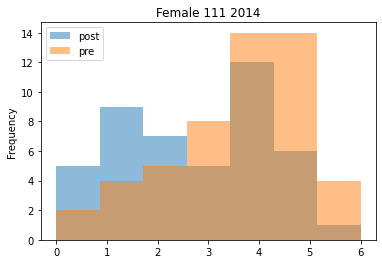

     111 FEMALE PRE  111 FEMALE POST 2014
6.0        0.052288              0.013333
0.0        0.091503              0.220000
2.0        0.130719              0.153333
1.0        0.150327              0.193333
3.0        0.176471              0.133333
4.0        0.189542              0.140000
5.0        0.209150              0.146667


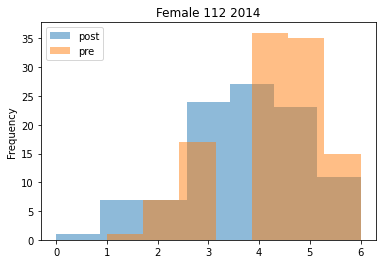

     112 FEMALE PRE  112 FEMALE POST 2014
0.0        0.004878              0.025510
1.0        0.029268              0.081633
2.0        0.078049              0.102041
6.0        0.107317              0.086735
3.0        0.175610              0.239796
4.0        0.297561              0.229592
5.0        0.307317              0.234694


In [109]:
FDM(df14_111, df14_112, "2014")

In [110]:
fdm111_pre

""


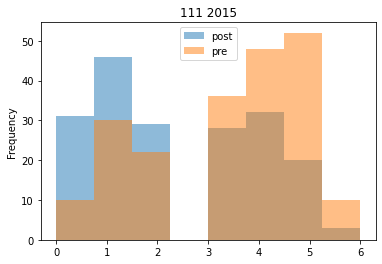

     111 PRE 2015  111 POST 2015
0.0      0.048077       0.164021
6.0      0.048077       0.015873
2.0      0.105769       0.153439
1.0      0.144231       0.243386
3.0      0.173077       0.148148
4.0      0.230769       0.169312
5.0      0.250000       0.105820


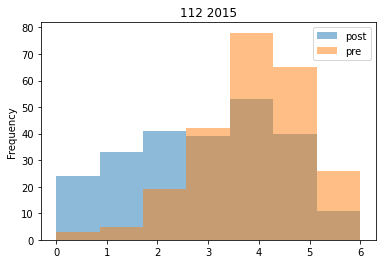

     112 PRE 2015  112 POST 2015
0.0      0.012605       0.099585
1.0      0.021008       0.136929
2.0      0.079832       0.170124
6.0      0.109244       0.045643
3.0      0.176471       0.161826
5.0      0.273109       0.165975
4.0      0.327731       0.219917


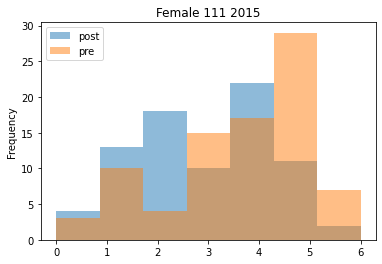

     111 FEMALE PRE  111 FEMALE POST 2015
0.0        0.048077              0.164021
6.0        0.048077              0.015873
2.0        0.105769              0.153439
1.0        0.144231              0.243386
3.0        0.173077              0.148148
4.0        0.230769              0.169312
5.0        0.250000              0.105820


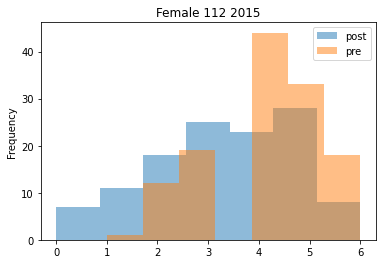

     112 FEMALE PRE  112 FEMALE POST 2015
0.0        0.012605              0.099585
1.0        0.021008              0.136929
2.0        0.079832              0.170124
6.0        0.109244              0.045643
3.0        0.176471              0.161826
5.0        0.273109              0.165975
4.0        0.327731              0.219917


In [111]:
FDM(df15_111, df15_112, "2015")

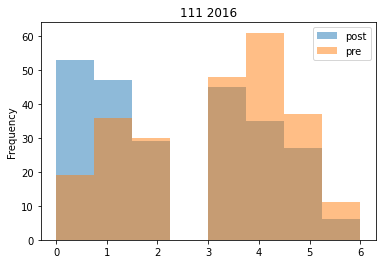

     111 PRE 2016  111 POST 2016
6.0      0.045455       0.024793
0.0      0.078512       0.219008
2.0      0.123967       0.119835
1.0      0.148760       0.194215
5.0      0.152893       0.111570
3.0      0.198347       0.185950
4.0      0.252066       0.144628


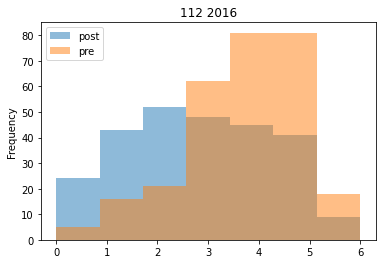

     112 PRE 2016  112 POST 2016
0.0      0.017606       0.091603
1.0      0.056338       0.164122
6.0      0.063380       0.034351
2.0      0.073944       0.198473
3.0      0.218310       0.183206
4.0      0.285211       0.171756
5.0      0.285211       0.156489


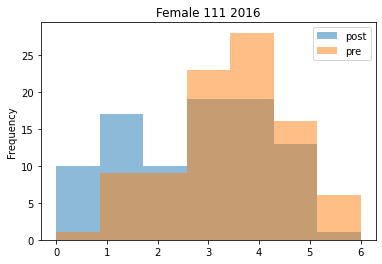

     111 FEMALE PRE  111 FEMALE POST 2016
6.0        0.045455              0.024793
0.0        0.078512              0.219008
2.0        0.123967              0.119835
1.0        0.148760              0.194215
5.0        0.152893              0.111570
3.0        0.198347              0.185950
4.0        0.252066              0.144628


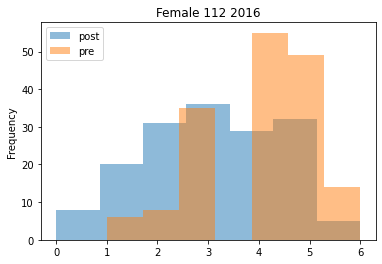

     112 FEMALE PRE  112 FEMALE POST 2016
0.0        0.017606              0.091603
1.0        0.056338              0.164122
6.0        0.063380              0.034351
2.0        0.073944              0.198473
3.0        0.218310              0.183206
4.0        0.285211              0.171756
5.0        0.285211              0.156489


In [112]:
FDM(df16_111, df16_112, "2016")

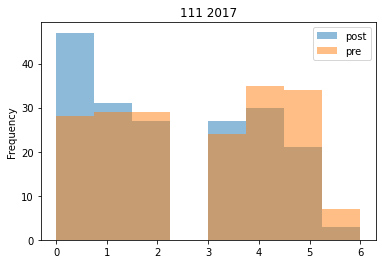

     111 PRE 2017  111 POST 2017
6.0      0.037634       0.016129
3.0      0.129032       0.145161
0.0      0.150538       0.252688
2.0      0.155914       0.145161
1.0      0.155914       0.166667
5.0      0.182796       0.112903
4.0      0.188172       0.161290


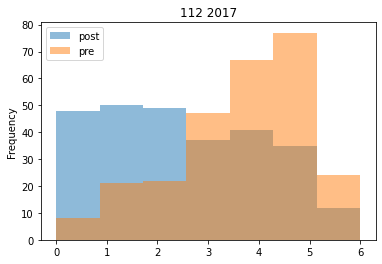

     112 PRE 2017  112 POST 2017
0.0      0.030075       0.176471
1.0      0.078947       0.183824
2.0      0.082707       0.180147
6.0      0.090226       0.044118
3.0      0.176692       0.136029
4.0      0.251880       0.150735
5.0      0.289474       0.128676


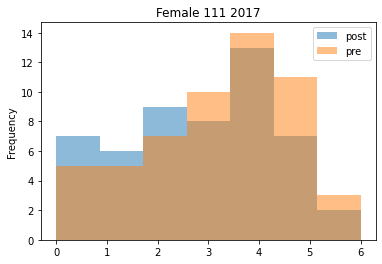

     111 FEMALE PRE  111 FEMALE POST 2017
6.0        0.037634              0.016129
3.0        0.129032              0.145161
0.0        0.150538              0.252688
2.0        0.155914              0.145161
1.0        0.155914              0.166667
5.0        0.182796              0.112903
4.0        0.188172              0.161290


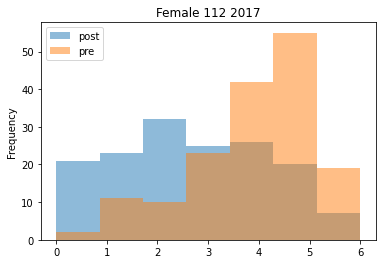

     112 FEMALE PRE  112 FEMALE POST 2017
0.0        0.030075              0.176471
1.0        0.078947              0.183824
2.0        0.082707              0.180147
6.0        0.090226              0.044118
3.0        0.176692              0.136029
4.0        0.251880              0.150735
5.0        0.289474              0.128676


In [113]:
FDM(df17_111, df17_112, "2017")

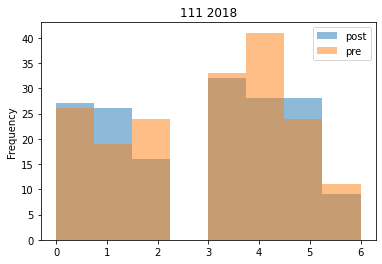

     111 PRE 2018  111 POST 2018
6.0      0.061798       0.054217
1.0      0.106742       0.156627
5.0      0.134831       0.168675
2.0      0.134831       0.096386
0.0      0.146067       0.162651
3.0      0.185393       0.192771
4.0      0.230337       0.168675


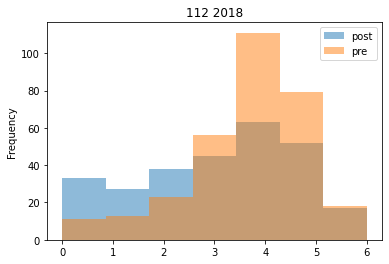

     112 PRE 2018  112 POST 2018
0.0      0.035370       0.120000
1.0      0.041801       0.098182
6.0      0.057878       0.061818
2.0      0.073955       0.138182
3.0      0.180064       0.163636
5.0      0.254019       0.189091
4.0      0.356913       0.229091


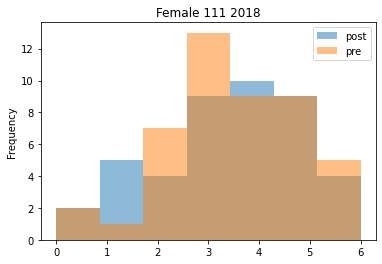

     111 FEMALE PRE  111 FEMALE POST 2018
6.0        0.061798              0.054217
1.0        0.106742              0.156627
5.0        0.134831              0.168675
2.0        0.134831              0.096386
0.0        0.146067              0.162651
3.0        0.185393              0.192771
4.0        0.230337              0.168675


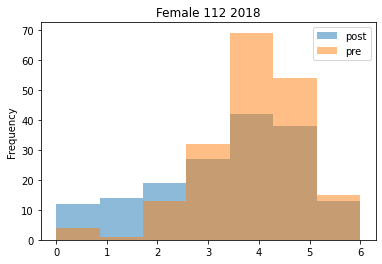

     112 FEMALE PRE  112 FEMALE POST 2018
0.0        0.035370              0.120000
1.0        0.041801              0.098182
6.0        0.057878              0.061818
2.0        0.073955              0.138182
3.0        0.180064              0.163636
5.0        0.254019              0.189091
4.0        0.356913              0.229091


In [114]:
FDM(df18_111, df18_112, "2018")

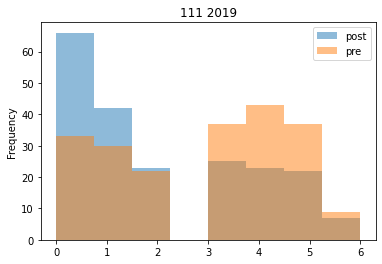

     111 PRE 2019  111 POST 2019
6.0      0.042654       0.033654
2.0      0.104265       0.110577
1.0      0.142180       0.201923
0.0      0.156398       0.317308
5.0      0.175355       0.105769
3.0      0.175355       0.120192
4.0      0.203791       0.110577


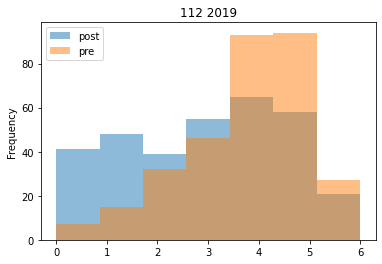

     112 PRE 2019  112 POST 2019
0.0      0.022293       0.125382
1.0      0.047771       0.146789
6.0      0.085987       0.064220
2.0      0.101911       0.119266
3.0      0.146497       0.168196
4.0      0.296178       0.198777
5.0      0.299363       0.177370


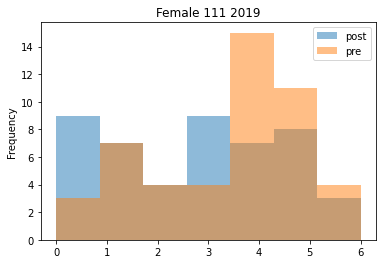

     111 FEMALE PRE  111 FEMALE POST 2019
6.0        0.042654              0.033654
2.0        0.104265              0.110577
1.0        0.142180              0.201923
0.0        0.156398              0.317308
5.0        0.175355              0.105769
3.0        0.175355              0.120192
4.0        0.203791              0.110577


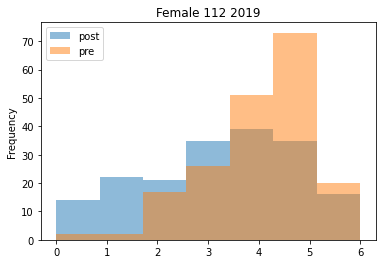

     112 FEMALE PRE  112 FEMALE POST 2019
0.0        0.022293              0.125382
1.0        0.047771              0.146789
6.0        0.085987              0.064220
2.0        0.101911              0.119266
3.0        0.146497              0.168196
4.0        0.296178              0.198777
5.0        0.299363              0.177370


In [115]:
FDM(df19_111, df19_112, "2019")

In [116]:
#FDM_2020(df20_111, df20_112)

In [117]:
fdm111

,111 PRE2014,111 POST2014,111 PRE2015,111 POST2015,111 PRE2016,111 POST2016,111 PRE2017,111 POST2017,111 PRE2018,111 POST2018,111 PRE2019,111 POST2019
6.0,0.052288,0.013333,0.048077,0.015873,0.045455,0.024793,0.037634,0.016129,0.061798,0.054217,0.042654,0.033654
0.0,0.091503,0.220000,0.048077,0.164021,0.078512,0.219008,0.150538,0.252688,0.146067,0.162651,0.156398,0.317308
2.0,0.130719,0.153333,0.105769,0.153439,0.123967,0.119835,0.155914,0.145161,0.134831,0.096386,0.104265,0.110577
1.0,0.150327,0.193333,0.144231,0.243386,0.148760,0.194215,0.155914,0.166667,0.106742,0.156627,0.142180,0.201923
3.0,0.176471,0.133333,0.173077,0.148148,0.198347,0.185950,0.129032,0.145161,0.185393,0.192771,0.175355,0.120192
4.0,0.189542,0.140000,0.230769,0.169312,0.252066,0.144628,0.188172,0.161290,0.230337,0.168675,0.203791,0.110577
5.0,0.209150,0.146667,0.250000,0.105820,0.152893,0.111570,0.182796,0.112903,0.134831,0.168675,0.175355,0.105769


In [118]:
fdm112

,112 PRE2014,112 POST2014,112 PRE2015,112 POST2015,112 PRE2016,112 POST2016,112 PRE2017,112 POST2017,112 PRE2018,112 POST2018,112 PRE2019,112 POST2019
0.0,0.004878,0.025510,0.012605,0.099585,0.017606,0.091603,0.030075,0.176471,0.035370,0.120000,0.022293,0.125382
1.0,0.029268,0.081633,0.021008,0.136929,0.056338,0.164122,0.078947,0.183824,0.041801,0.098182,0.047771,0.146789
2.0,0.078049,0.102041,0.079832,0.170124,0.073944,0.198473,0.082707,0.180147,0.073955,0.138182,0.101911,0.119266
6.0,0.107317,0.086735,0.109244,0.045643,0.063380,0.034351,0.090226,0.044118,0.057878,0.061818,0.085987,0.064220
3.0,0.175610,0.239796,0.176471,0.161826,0.218310,0.183206,0.176692,0.136029,0.180064,0.163636,0.146497,0.168196
4.0,0.297561,0.229592,0.327731,0.219917,0.285211,0.171756,0.251880,0.150735,0.356913,0.229091,0.296178,0.198777
5.0,0.307317,0.234694,0.273109,0.165975,0.285211,0.156489,0.289474,0.128676,0.254019,0.189091,0.299363,0.177370


In [176]:
fdm = fdm111.join(fdm112)
fdm.loc[-1] = [111, 111, 111, 111, 111, 111,111, 111, 111, 111, 111, 111,112 ,112, 112, 112 ,112, 112,112 ,112, 112, 112 ,112, 112 ]
fdm.loc[-2] = [2014, 2014, 2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019, 2014, 2014, 2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019]
fdm.loc[-3] = ["Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post"] # adding a row
fdm.sort_index()

,111 PRE2014,111 POST2014,111 PRE2015,111 POST2015,111 PRE2016,111 POST2016,111 PRE2017,111 POST2017,111 PRE2018,111 POST2018,...,112 PRE2015,112 POST2015,112 PRE2016,112 POST2016,112 PRE2017,112 POST2017,112 PRE2018,112 POST2018,112 PRE2019,112 POST2019
-3.0,Pre,Post,Pre,Post,Pre,Post,Pre,Post,Pre,Post,...,Pre,Post,Pre,Post,Pre,Post,Pre,Post,Pre,Post
-2.0,2014.0,2014.0,2015.0,2015.0,2016.0,2016.0,2017.0,2017.0,2018.0,2018.0,...,2015.0,2015.0,2016.0,2016.0,2017.0,2017.0,2018.0,2018.0,2019.0,2019.0
-1.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,...,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0
0.0,0.091503,0.22,0.048077,0.164021,0.078512,0.219008,0.150538,0.252688,0.146067,0.162651,...,0.012605,0.099585,0.017606,0.091603,0.030075,0.176471,0.03537,0.12,0.022293,0.125382
1.0,0.150327,0.193333,0.144231,0.243386,0.14876,0.194215,0.155914,0.166667,0.106742,0.156627,...,0.021008,0.136929,0.056338,0.164122,0.078947,0.183824,0.041801,0.098182,0.047771,0.146789
2.0,0.130719,0.153333,0.105769,0.153439,0.123967,0.119835,0.155914,0.145161,0.134831,0.096386,...,0.079832,0.170124,0.073944,0.198473,0.082707,0.180147,0.073955,0.138182,0.101911,0.119266
3.0,0.176471,0.133333,0.173077,0.148148,0.198347,0.18595,0.129032,0.145161,0.185393,0.192771,...,0.176471,0.161826,0.21831,0.183206,0.176692,0.136029,0.180064,0.163636,0.146497,0.168196
4.0,0.189542,0.14,0.230769,0.169312,0.252066,0.144628,0.188172,0.16129,0.230337,0.168675,...,0.327731,0.219917,0.285211,0.171756,0.25188,0.150735,0.356913,0.229091,0.296178,0.198777
5.0,0.20915,0.146667,0.25,0.10582,0.152893,0.11157,0.182796,0.112903,0.134831,0.168675,...,0.273109,0.165975,0.285211,0.156489,0.289474,0.128676,0.254019,0.189091,0.299363,0.17737
6.0,0.052288,0.013333,0.048077,0.015873,0.045455,0.024793,0.037634,0.016129,0.061798,0.054217,...,0.109244,0.045643,0.06338,0.034351,0.090226,0.044118,0.057878,0.061818,0.085987,0.06422


In [183]:
fdm2 = fdm.sort_index().transpose()
fdm2.columns=["Pre/Post", "Year", "Section", 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
fdm2

,Pre/Post,Year,Section,0.0,1.0,2.0,3.0,4.0,5.0,6.0
111 PRE2014,Pre,2014.0,111.0,0.091503,0.150327,0.130719,0.176471,0.189542,0.20915,0.052288
111 POST2014,Post,2014.0,111.0,0.22,0.193333,0.153333,0.133333,0.14,0.146667,0.013333
111 PRE2015,Pre,2015.0,111.0,0.048077,0.144231,0.105769,0.173077,0.230769,0.25,0.048077
111 POST2015,Post,2015.0,111.0,0.164021,0.243386,0.153439,0.148148,0.169312,0.10582,0.015873
111 PRE2016,Pre,2016.0,111.0,0.078512,0.14876,0.123967,0.198347,0.252066,0.152893,0.045455
111 POST2016,Post,2016.0,111.0,0.219008,0.194215,0.119835,0.18595,0.144628,0.11157,0.024793
111 PRE2017,Pre,2017.0,111.0,0.150538,0.155914,0.155914,0.129032,0.188172,0.182796,0.037634
111 POST2017,Post,2017.0,111.0,0.252688,0.166667,0.145161,0.145161,0.16129,0.112903,0.016129
111 PRE2018,Pre,2018.0,111.0,0.146067,0.106742,0.134831,0.185393,0.230337,0.134831,0.061798
111 POST2018,Post,2018.0,111.0,0.162651,0.156627,0.096386,0.192771,0.168675,0.168675,0.054217


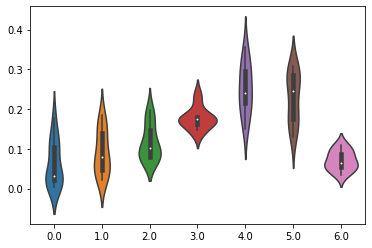

In [185]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
ax = sns.violinplot(data = fdm112.sort_index().transpose())

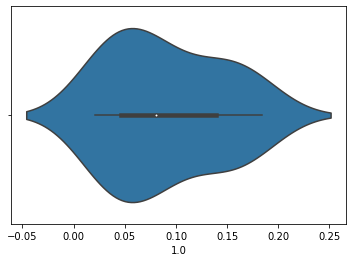

In [135]:
ax1 = sns.violinplot(x=fdm112.iloc[1])

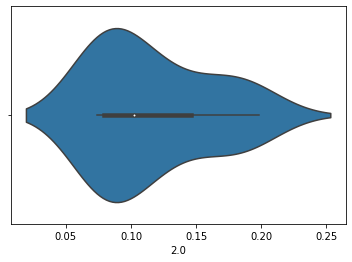

In [136]:
ax2 = sns.violinplot(x=fdm112.iloc[2])

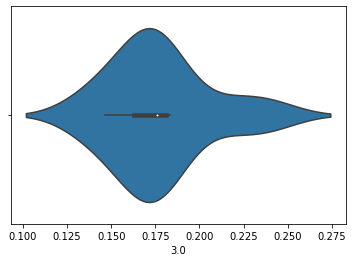

In [142]:
ax3 = sns.violinplot(x=fdm112.iloc[4])

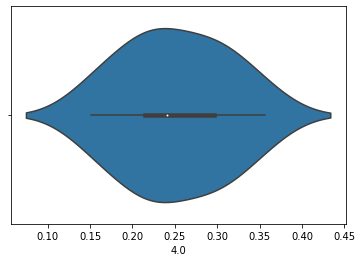

In [143]:
ax3 = sns.violinplot(x=fdm112.iloc[5])

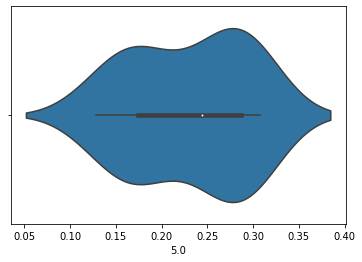

In [144]:
ax3 = sns.violinplot(x=fdm112.iloc[6])

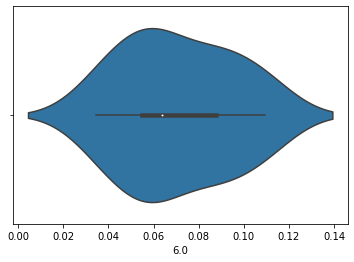

In [145]:
ax3 = sns.violinplot(x=fdm112.iloc[3])